Desmond Kager 
Anne Lightbody
ESCI 895
December 7 2021

Examining river regulation’s effect on flood frequency between various climates and water resource development types

Introduction:

River regulation is the act of controlling river water level or the variability of river flows to meet human demands. Rivers are dammed and channels are rerouted in order to fulfill these demands which vary from flood control and power generation to drinking water supplies and irrigation for agriculture. Dams have a significant impact on rivers, the two most important being limiting the movement of water and sediment downstream. Reduction of flows increases channel stability downstream and limits sediment deposition making dammed rivers geometry relics of the fluvial environment that existed before dam construction. Dams also impact the magnitude and frequency of floods by absorbing many small floods and significantly reducing large ones through reservoir storage.  These significant differences between regulated and unregulated rivers impact hydrologists ability to accurately estimate  flood size and frequency. 
Accurately predicting the magnitude and frequency of floods can help city planners build resilient infrastructure that is built in accordance with flood frequency equations that account for river regulation.The goal of this study is to see how  similar sized regulated and unregulated rivers flood frequency compare between various climates and water resource development types?


 Site description: 
To demonstrate the effect that regulation has on flood frequency, 4 stream gauges were chosen two with regulation and two without regulation. In order to analyze the effect climate has on flood frequencies two of these sites are located in South Carolina and two in Northern New Hampshire. The first stream gauge I chose is located in the western side of South Carolina on the 200 mile long Saluda River. This river is heavily regulated with dams and is located in an area with substantial industrial agriculture and high waste water release. The second gauge in South Carolina is located in the nearby Reedy River. The Reedy River is a 68 mile long river which eventually joins the Saluda river 9 miles north of Lake Greenwood. I chose the Reedy River because it doesn't have any regulation from dams unlike the Saluda River.  The third stream gauge I chose is located on the Connecticut River in Northern New Hampshire. This river is regulated from the Murphy dam which stores water from the first and second Connecticut Lakes. The last stream gauge is located on the Diamond River near Wentworth NH. This river does not have significant regulation affecting streamflow. Both NH gauges are located in rural areas with limited development and human influence.

Peak annual discharge was obtained from USGS streamflow gauging sites for each of the four stream gauges located in figure 1. 15 minute discharge measurements were also obtained from the USGS streamflow gauging sites in order to construct hydrographs of the specific storm events. Hourly precipitation was acquired from NOAA’s rain gauges in order to analyze how precipitation affects the discharges at the specific stream gauges. 


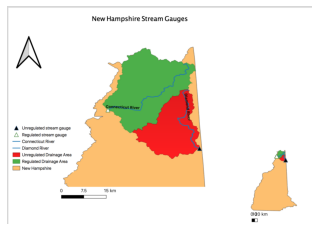

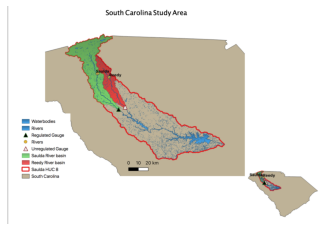

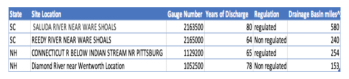

In [86]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime as dt
import glob 

from PIL import Image

import warnings
warnings.filterwarnings("ignore")

#%% Loads in both site maps 
filelist= ['NH_sites.png','SC_sites.png','Table.png' ]

for imagefile in filelist:
    im=Image.open(imagefile)
    plt.imshow(im)
    plt.axis('off')
    plt.show()

In [87]:
# creates color class
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



Hello World !


In [88]:
#%% List containin names of  daily discharge and annual peak flow

filenames = ['peak_regulatedNH.txt','peak_unregulatedNH.txt','peakunregulatedSC.txt','peakregulatedSC.txt']  
dfpeak= pd.read_csv(filenames[0], delimiter= '\t',comment= '#',header=1,
                 parse_dates=['10d'])
dfpeak2= pd.read_csv(filenames[1], delimiter= '\t',comment= '#',header=1,
                 parse_dates=['10d'])
dfpeak3= pd.read_csv(filenames[2], delimiter= '\t',comment= '#',header=1,
                 parse_dates=['10d'])
dfpeak4= pd.read_csv(filenames[3], delimiter= '\t',comment= '#',header=1,
                 parse_dates=['10d'])

In [89]:
#%% Sorrting peak data 
#NH unregulated dfpeak
dfpeak=dfpeak.rename(columns={'10d': 'DATE'})
dfpeak=dfpeak.rename(columns={'8s': 'peak_flow'})
dfpeak= dfpeak.set_index('DATE')
dfpeak= dfpeak[['peak_flow']]

#NH dfpeak regulated
dfpeak2=dfpeak2.rename(columns={'10d': 'DATE'})
dfpeak2=dfpeak2.rename(columns={'8s': 'peak_flow'})
dfpeak2= dfpeak2.set_index('DATE')
dfpeak2= dfpeak2[['peak_flow']]

#SC unregulated dfpeaknflow
dfpeak3=dfpeak3.rename(columns={'10d': 'DATE'})
dfpeak3=dfpeak3.rename(columns={'8s': 'peak_flow'})
dfpeak3= dfpeak3.set_index('DATE')
dfpeak3= dfpeak3[['peak_flow']]
dfpeak3= dfpeak3.drop_duplicates()

#SC dfpeak regulated
dfpeak4=dfpeak4.rename(columns={'10d': 'DATE'})
dfpeak4=dfpeak4.rename(columns={'8s': 'peak_flow'})
dfpeak4= dfpeak4.set_index('DATE')
dfpeak4= dfpeak4[['peak_flow']]

In [90]:
#%% converting discharge as an aeral depth by dividing by watershed area
watershedarea=  254*2589988.11

watershedarea2=  153*2589988.11

watershedarea3=  240*2589988.11

watershedarea4=  580*2589988.11

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfpeak["peak_flow"] = (dfpeak['peak_flow']*28316*3600*24*365)/(watershedarea*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfpeak2["peak_flow"] = (dfpeak2['peak_flow']*28316*3600*24*365)/(watershedarea2*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfpeak3["peak_flow"] = (dfpeak3['peak_flow']*28316*3600*24*365)/(watershedarea3*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfpeak4["peak_flow"] = (dfpeak4['peak_flow']*28316*3600*24*365)/(watershedarea4*10000)


In [115]:
#%% mean peaks accounting for area

def average(peak):
   
    mean= peak['peak_flow'].mean()
    print(mean)
    standard_deviation= peak['peak_flow'].std()
    print(standard_deviation)
  
    return peak
print(color.BOLD +"NH average regulated discharge and std  "+ color.END)
average(dfpeak)
print(color.BOLD +"NH average unregulated discharge and std  "+ color.END)
average(dfpeak2)
print(color.BOLD +"SC average unregulated discharge and std  "+ color.END)
average(dfpeak3)
print(color.BOLD +"SC average regulated discharge and std  "+ color.END)
average(dfpeak4)

NH average regulated discharge and std  
426.64558995461465
152.67162135507868
NH average unregulated discharge and std  
1171.3979249796985
421.6767276350328
SC average unregulated discharge and std  
666.101623384052
340.2212778401633
SC average regulated discharge and std  
573.7846536543303
269.15747164766947


,peak_flow,log10
DATE,,
1940-08-13,1224.559712,3.087980
1941-07-07,297.817678,2.473950
1942-03-21,493.390564,2.693191
1943-01-18,909.503087,2.958804
1944-03-20,695.502361,2.842299
...,...,...
1997-03-01,564.724139,2.751836
1998-04-17,850.058441,2.929449
1999-02-02,208.056262,2.318181


In [92]:
#%% Trimming Peak data
startdate1= dt.datetime(1957,1,1)
enddate1= dt.datetime(2019,1,1)

startdate2= dt.datetime(1940,1,1)
enddate2= dt.datetime(2002,1,1)

dfpeak= dfpeak[startdate1:enddate1]
dfpeak2= dfpeak2[startdate1:enddate1]
dfpeak3= dfpeak3[startdate2:enddate2]
dfpeak4= dfpeak4[startdate2:enddate2]

In [93]:
#%% Sortting daily peak by peak flow
sorted_daily_peak= dfpeak.sort_values(by= 'peak_flow',   ascending= False)
sorted_daily_peak2= dfpeak2.sort_values(by= 'peak_flow', ascending= False)
sorted_daily_peak3= dfpeak3.sort_values(by= 'peak_flow', ascending= False)
sorted_daily_peak4= dfpeak4.sort_values(by= 'peak_flow', ascending= False)

In [94]:
#%% return period function
def return_period(sorted_peak):

    
    #create new column rank to determine the highest flows 
    sorted_peak['rank']= sorted_peak['peak_flow'].rank( ascending= False, method= 'first')
    #number of years is equal to n
    n= len(sorted_peak)
    #calculate the exceedence probablity 
    sorted_peak['EP']= sorted_peak['rank']/(n+1) 
    #caluclates the return interval
    sorted_peak['TR']= (1/ sorted_peak['EP'])
    
    return sorted_peak

return_period(sorted_daily_peak)
return_period(sorted_daily_peak2)
return_period(sorted_daily_peak3)
return_period(sorted_daily_peak4)


sorted_daily_values= sorted_daily_peak.sort_values(by= 'TR'   )
sorted_daily_values2= sorted_daily_peak2.sort_values(by= 'TR'   )
sorted_daily_values3= sorted_daily_peak3.sort_values(by= 'TR'   )
sorted_daily_values4= sorted_daily_peak4.sort_values(by= 'TR'   )


In [95]:
#%% rank function 
                                            
interp= np.array([2,5,10,25,50,100])

dfinterp= pd.DataFrame(interp, columns= ['Return Period'])
dfinterp2= pd.DataFrame(interp, columns= ['Return Period'])
dfinterp3= pd.DataFrame(interp, columns= ['Return Period'])
dfinterp4= pd.DataFrame(interp, columns= ['Return Period'])

def rank(sorted_peak):
    
    sorted_peak= sorted_peak.sort_values(by= 'rank', ascending= False)
    return sorted_peak

rank(sorted_daily_peak)
rank(sorted_daily_peak2)
rank(sorted_daily_peak3)
rank(sorted_daily_peak4)


,peak_flow,rank,EP,TR
DATE,,,,
1980-10-01,158.122759,62.0,0.984127,1.016129
1970-03-22,168.822795,61.0,0.968254,1.032787
1985-11-30,194.383993,60.0,0.952381,1.050000
1988-01-21,207.461815,59.0,0.936508,1.067797
1999-02-02,208.056262,58.0,0.920635,1.086207
...,...,...,...,...
1964-04-08,992.725592,5.0,0.079365,12.600000
1963-03-06,1046.225773,4.0,0.063492,15.750000
1940-08-13,1224.559712,3.0,0.047619,21.000000


In [96]:
#%% Interp function 

def interp(df_interp,sorted_peak,peak):
    
    df_interp['interp_values']= np.interp(df_interp['Return Period'], sorted_peak['TR'],
                                       sorted_peak['peak_flow'])
    #log transformed data  3.1
    peak['log10']= np.log10(peak['peak_flow'])
    # 3.3 log means 
    mean_log= peak['log10'].mean()
    print('mean log is' +str(mean_log))
    #calculates standard deviation of peak flow log
    standard_deviation_log= peak['log10'].std()
    print('standard deviation log is' +str(standard_deviation_log))
    #adds the EP to the dfinterp column 
    df_interp['EP']= 1/df_interp['Return Period']
    #calculates the log normal frequncy factor and add kep to interp
    df_interp['Kep']= ((1-df_interp['EP'])**.135-(df_interp['EP'])**.135)/.1975

    #equation 4 log discharge and add to dfinterp
    df_interp['logQp']= peak['log10'].mean() +peak['log10'].std()*df_interp['Kep']

    #calculated for the dfinterp dataframe
    df_interp['est discharge logQp']=10**(df_interp['logQp'])
    
    return df_interp
print('NH Regulated')
interp(dfinterp,sorted_daily_values,dfpeak)
print('NH Unregulated')
interp(dfinterp2,sorted_daily_values2,dfpeak2)
print('SC Unregulated')
interp(dfinterp3,sorted_daily_values3,dfpeak3)
print(' SC Regulated')
interp(dfinterp4,sorted_daily_values4,dfpeak4)

NH Regulated
mean log is2.60492976320539
standard deviation log is0.1474310601037865
NH Unregulated
mean log is3.042515907578134
standard deviation log is0.15331995074740895
SC Unregulated
mean log is2.767085913277702
standard deviation log is0.22768539375467156
 SC Regulated
mean log is2.7069864466729854
standard deviation log is0.22304234854500013


,Return Period,interp_values,EP,Kep,logQp,est discharge logQp
0,2,560.496964,0.50,0.000000,2.706986,509.314976
1,5,786.367748,0.20,0.838559,2.894021,783.466998
2,10,957.058804,0.10,1.281278,2.992766,983.480562
3,25,1226.824270,0.04,1.756694,3.098804,1255.462020
4,50,1237.486564,0.02,2.063623,3.167262,1469.812124
5,100,1242.393106,0.01,2.337278,3.228298,1691.602563


In [116]:
#%% GSX function 
def gsx(interp,peak):
    
    # section 4.2 gsx equation 
    N=len(interp)
    gsx= (N*sum((peak['log10']
                            -peak['log10'].mean())**3)/((N-1)*(N-2)*peak['log10'].mean()**3))
    print('gsx='+ str(gsx))
    
    #calculate the  mean square error of station skew
    print('regional skew is .3')
    #based on USGS regional skew map 
    grx= .3
    #equations based on gsx values for mean square error 
    a= -.33 +.08+gsx
    b= .94 -.26 +gsx
    
    MSEgsx= (10**(a+b)/N**b)
    print('MSEgsx='+ str(MSEgsx))
    #given mean square error regional skew 
    MSEgrx= .302
    #the minimum mean square error weighted skew estimate
    gx= ((gsx/MSEgsx)+(grx/MSEgrx))/((1/MSEgsx)+(1/MSEgrx))
    print('gx=' +str(gx))
    #frequency factor kg exceedence probablity
    interp['Kg']= (2/gx)*(1+gx*((((1-interp['EP'])**.135)-
                      interp['EP']**.135)/1.185) - ((gx/36)**2))**3 - (2/gx)
    #equation 5 log discharge and add to dfinterp
    interp['lognew']= peak['log10'].mean() +peak['log10'].std()*interp['Kg']
    
    #calculated for the dfinterp dataframe
    interp['lognew']=10**(interp['lognew'])
    
    return interp
print(color.BOLD +"NH Regulated   "+ color.END)
gsx(dfinterp,dfpeak)
print(color.BOLD +"NH Unregulated   "+ color.END)
gsx(dfinterp2,dfpeak2)
print(color.BOLD +"SC Unregulated   "+ color.END)
gsx(dfinterp3,dfpeak3)
print(color.BOLD +"SC Regulated   "+ color.END)
gsx(dfinterp4,dfpeak4)


NH Regulated   
gsx=0.0006869023269967602
regional skew is .3
MSEgsx=0.7974371065290259
gx=0.21778287729198034
NH Unregulated   
gsx=-0.00048392921199591867
regional skew is .3
MSEgsx=0.7948146463800269
gx=0.2172639179085316
SC Unregulated   
gsx=-0.0013133649268366532
regional skew is .3
MSEgsx=0.7929620743334185
gx=0.2168951707635163
SC Regulated   
gsx=-0.004460592301073262
regional skew is .3
MSEgsx=0.7859718297007566
gx=0.2154876106486931


,Return Period,interp_values,EP,Kep,logQp,est discharge logQp,Kg,lognew
0,2,560.496964,0.50,0.000000,2.706986,509.314976,-0.000998,509.054102
1,5,786.367748,0.20,0.838559,2.894021,783.466998,0.863009,793.366699
2,10,957.058804,0.10,1.281278,2.992766,983.480562,1.340051,1013.618749
3,25,1226.824270,0.04,1.756694,3.098804,1255.462020,1.868729,1329.817681
4,50,1237.486564,0.02,2.063623,3.167262,1469.812124,2.219195,1592.065062
5,100,1242.393106,0.01,2.337278,3.228298,1691.602563,2.537792,1875.087411


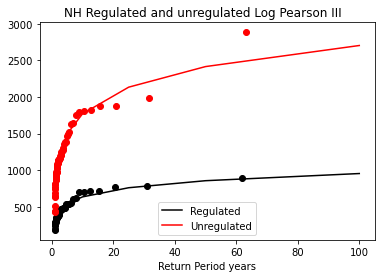

In [98]:
#%% NH Plotting 
fig,(ax4)= plt.subplots(1,1)
ax4.set_title('NH Regulated and unregulated Log Pearson III  ')
#plots the measured peak discharge values 
ax4.plot(sorted_daily_peak['TR'],sorted_daily_peak['peak_flow'],'o', color= 'k')
                    
ax4.set_xlabel('Return Period years')
#plot log pearson 3
ax4.plot(dfinterp['Return Period'], dfinterp['lognew'], color= 'k', label= 'Regulated')
ax4.legend(loc='lower center')
#plots the measured peak discharge values 
ax4.plot(sorted_daily_peak2['TR'],sorted_daily_peak2['peak_flow'],'o', color= 'r')
ax4.set_xlabel('Return Period years')

ax4.plot(dfinterp2['Return Period'], dfinterp2['lognew'], color= 'r', label= 'Unregulated')

ax4.legend(loc='lower center')

plt.show()

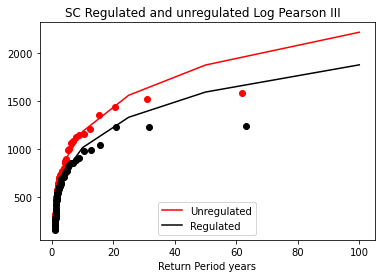

In [99]:
#%% SC plotting 
fig,(ax5)= plt.subplots(1,1)
ax5.set_title('SC Regulated and unregulated Log Pearson III  ')
ax5.plot(sorted_daily_peak3['TR'],sorted_daily_peak3['peak_flow'],'o', color= 'r')
ax5.set_xlabel('Return Period years')

ax5.plot(dfinterp3['Return Period'], dfinterp3['lognew'], color= 'r', label= 'Unregulated')
#plots the measured peak discharge values 
ax5.plot(sorted_daily_peak4['TR'],sorted_daily_peak4['peak_flow'],'o', color= 'k')
                    
ax5.set_xlabel('Return Period years')

#plot log pearson 3
ax5.plot(dfinterp4['Return Period'], dfinterp4['lognew'], color= 'k', label= 'Regulated')
ax5.legend(loc='lower center')

ax5.legend(loc='lower center')

plt.show()


In [100]:
#%% Loads in NH 15 min regulated data 4 files 
path = '/Users/desmond/Desktop/UNH final hydrology data/NH_regulated15' 
all_files = glob.glob(path + "/*.txt")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None,parse_dates=['20d'],delimiter= '\t',comment='#',  header=1)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame=frame[['20d','14n']]
frame= frame.rename (columns={'20d':'DATE'})
frame=frame.rename(columns={'14n':'discharge_R'})
frame=frame.set_index('DATE')

In [101]:
#%% Loads in NH unregulated 15 min data 
path2 = '/Users/desmond/Desktop/UNH final hydrology data/NH_unregulated15' 
all_files2 = glob.glob(path2 + "/*.txt")

li2 = []

for filename in all_files2:
    df2 = pd.read_csv(filename, parse_dates=['20d'],index_col=None,delimiter= '\t',comment='#',  header=1)
    li2.append(df2)
    
frame2 = pd.concat(li2, axis=0, ignore_index=True)
frame2=frame2[['20d','14n']]
frame2= frame2.rename (columns={'20d':'DATE'})
frame2=frame2.rename(columns={'14n':'discharge_U'})
frame2=frame2.set_index('DATE')
#Merges the data for NH regulated and Unregulated into a singular df

dfboth= pd.merge(frame,frame2, on='DATE', how='outer')


In [102]:
#%% Loading South Carolina regulated 15 min discharge 
path3 = '/Users/desmond/Desktop/UNH final hydrology data/SC_regulated15' 
all_files3 = glob.glob(path3 + "/*.txt")

li3 = []
for filename in all_files3:
    df3 = pd.read_csv(filename, index_col=None,parse_dates=['20d'],delimiter= '\t',comment='#',  header=1)
    li3.append(df3)

frame3 = pd.concat(li3, axis=0, ignore_index=True)

frame3=frame3[['20d','14n']]
frame3= frame3.rename (columns={'20d':'DATE'})
frame3=frame3.rename(columns={'14n':'discharge_R'})
frame3=frame3.set_index('DATE')

In [103]:
#%% Loading South Carolina unregulated 15 min discharge 
path4 = '/Users/desmond/Desktop/UNH final hydrology data/SC_unregulated15' 
all_files4 = glob.glob(path4 + "/*.txt")

li4 = []
for filename in all_files4:
    df4 = pd.read_csv(filename, index_col=None,parse_dates=['20d'],delimiter= '\t',comment='#',  header=1)
    li4.append(df4)
    
frame4= pd.concat(li4, axis=0, ignore_index=True)
frame4=frame4[['20d','14n']]
frame4= frame4.rename (columns={'20d':'DATE'})
frame4=frame4.rename(columns={'14n':'discharge_U'})
frame4=frame4.set_index('DATE')

# Merges the data for SC regulated and Unregulated into a singular df
dfboth_SC= pd.merge(frame3,frame4, on='DATE', how='outer')

In [104]:
#%% Loading IN NH Precip data 
path5 = '/Users/desmond/Desktop/UNH final hydrology data/Precip_NH' 
all_files5 = glob.glob(path5 + "/*.csv")
li5 = []

for filename in all_files5:
    df5 = pd.read_csv(filename, index_col=None,parse_dates=['DATE'],delimiter= ',',comment='#',
                      header=0, na_values=(-9999,'T'))
    li5.append(df5)

precip_NH = pd.concat(li5, axis=0, ignore_index=True)
precip_NH=precip_NH[['DATE','HourlyPrecipitation']]
precip_NH=precip_NH.set_index('DATE')
precip_NH.sort_index(inplace=True)

for col in precip_NH:
    precip_NH[col] = pd.to_numeric(precip_NH[col], errors='coerce')

precip_NH.interpolate(method='linear',inplace = True)
precip_NH.fillna(method = 'ffill',inplace=True)
precip_NH.fillna(method = 'bfill',inplace=True)


precip_NH['precipcm']=precip_NH['HourlyPrecipitation']*2.54


In [105]:
#%% Loading IN SC Precip data 
path6 = '/Users/desmond/Desktop/UNH final hydrology data/Precip_SC' 
all_files6 = glob.glob(path6+ "/*.csv")
li6 = []

for filename in all_files6:
    df6 = pd.read_csv(filename, index_col=None,parse_dates=['DATE'],delimiter= ',',comment='#',
                      header=0, na_values=(-9999,'T'))
    li6.append(df6)

precip_SC = pd.concat(li6, axis=0, ignore_index=True)
precip_SC=precip_SC[['DATE','HourlyPrecipitation']]
precip_SC=precip_SC.set_index('DATE')
precip_SC.sort_index(inplace=True)

for col in precip_SC:
    precip_SC[col] = pd.to_numeric(precip_SC[col], errors='coerce')


precip_SC.interpolate(method='linear',inplace = True)
precip_SC.fillna(method = 'ffill',inplace=True)
precip_SC.fillna(method = 'bfill',inplace=True)
#conver inches to cm
precip_SC['precipcm']=precip_SC['HourlyPrecipitation']*2.54


In [106]:
#%% Plotting function for hydrographs 
dfboth.sort_index(inplace=True)
dfboth_SC.sort_index(inplace=True)

In [107]:
#%% runnning plots for regulate and unregulated NH
#need it to run through each storm 
startdate_1= (dt.datetime(2005,10,14))
enddate_1= (dt.datetime(2005,10,19))
startdate_2= (dt.datetime(2019,10,5))
enddate_2= (dt.datetime(2019,10,10))
startdate_3= (dt.datetime(2011,5,20))
enddate_3= (dt.datetime(2011,5,30))


startdate_4= (dt.datetime(1998,4,15))
enddate_4= (dt.datetime(1998,4,25))
startdate_5= (dt.datetime(1995,8,26))
enddate_5= (dt.datetime(1995,9,1))
startdate_6= (dt.datetime(1990,10,18))
enddate_6= (dt.datetime(1990,10,27))


precip_NH2= precip_NH.copy()
dfboth2= dfboth.copy()
precip_NH3= precip_NH.copy()
dfboth3= dfboth.copy()


dfboth_SC2= dfboth_SC.copy()
dfboth_SC3= dfboth_SC.copy()

precip_SC2= precip_SC.copy()
precip_SC3= precip_SC.copy()

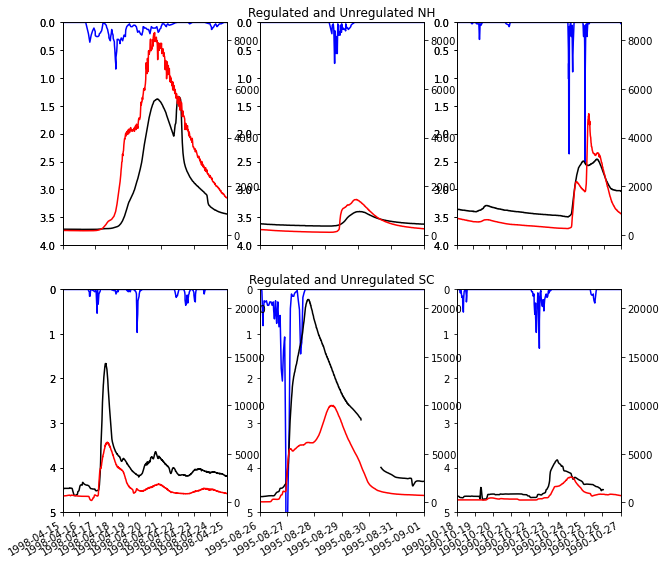

In [108]:
#%% Time series plot for 6 storms

#creates plotting function that does plotting for all  NH timeseries 
def timeseriesplot(dfboth,dfboth2,dfboth3,dfboth_SC,dfboth_SC2,dfboth_SC3,
                   precip_NH,precip_NH2,precip_NH3,precip_SC,precip_SC2,precip_SC3,
                   startdate_1,enddate_1,startdate_2,enddate_2,startdate_3,enddate_3,
                   startdate_4,enddate_4,startdate_5,enddate_5,startdate_6,enddate_6):
    
    fig, ax = plt.subplots(2,3, figsize=(10,10))
    
    ax[0,0].set_ylim(bottom= 0, top=4)
    ax[0,0].invert_yaxis()
    ax[0,0]= ax[0,0].twinx()
    
    ax[0,1].set_ylim(bottom= 0, top=4)
    ax[0,1].invert_yaxis()
    ax[0,1]= ax[0,1].twinx()
    
    ax[0,2].set_ylim(bottom= 0, top=4)
    ax[0,2].invert_yaxis()
    ax[0,2]= ax[0,2].twinx()
    #ax[0,0].set_ylabel('Discharge (mm/day)', color='r') 
                           
    ax[0,0].plot(precip_NH['precipcm'], color = 'b', linestyle = '-', label = 'precip')
    #ax[0,0].set_title('RegulatedNH')
    
    ax[0,1].plot(precip_NH2['precipcm'], color = 'b', linestyle = '-', label = 'precip')
    #ax[0,1].set_title('RegulatedNH')
    
    ax[0,2].plot(precip_NH3['precipcm'], color = 'b', linestyle = '-', label = 'precip')
    #ax[0,2].set_title('RegulatedNH')
    
    ax[0,0].set_ylim(bottom= 0, top=4)
    ax[0,0].invert_yaxis()
    ax[0,0]= ax[0,0].twinx()
    
    ax[0,1].set_ylim(bottom= 0, top=4)
    ax[0,1].invert_yaxis()
    ax[0,1]= ax[0,1].twinx()
    
    
    ax[0,2].set_ylim(bottom= 0, top=4)
    ax[0,2].invert_yaxis()
    ax[0,2]= ax[0,2].twinx()

    ax[0,0].plot(dfboth['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
   # ax[0,0].set_title('RegulatedNH')
    
    ax[0,0].plot(dfboth['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    #ax[0,0].set_title('UnregulatedNH')
    
    ax[0,1].plot(dfboth2['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
    ax[0,1].set_title('Regulated and Unregulated NH')
   
    ax[0,1].plot(dfboth2['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    #ax[0,1].set_title('UnregulatedNH')
    
    ax[0,2].plot(dfboth3['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
    #ax[0,2].set_title('RegulatedNH')
 
    ax[0,2].plot(dfboth3['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    
    #South Carolina PLots
    ax[1,0].set_ylim(bottom= 0, top=5)
    ax[1,0].invert_yaxis()
    ax[1,0]= ax[1,0].twinx()
   
 
    ax[1,0].plot(precip_SC['precipcm'], color = 'blue', linestyle = '-', label = 'precip')
    #ax[1,0].set_title('Regulated SC')
    
    
    ax[1,1].plot(precip_SC2['precipcm'], color = 'blue', linestyle = '-', label = 'precip')
    #ax[1,1].set_title('Unregulated SC')
    
     
    ax[1,2].plot(precip_SC3['precipcm'], color = 'blue', linestyle = '-', label = 'precip')
    #ax[1,2].set_title('Unregulated SC')
    
    ax[1,0].set_ylim(bottom= 0, top=5)
    ax[1,0].invert_yaxis()
    ax[1,0]= ax[1,0].twinx()
     
    ax[1,1].set_ylim(bottom= 0, top=5)
    ax[1,1].invert_yaxis()
    ax[1,1]= ax[1,1].twinx()
 

    ax[1,2].set_ylim(bottom= 0, top=5)
    ax[1,2].invert_yaxis()
    ax[1,2]= ax[1,2].twinx()
    
    
    
    ax[1,0].plot(dfboth_SC['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
    #ax[1,0].set_title('Regulated SC')
    
    ax[1,0].plot(dfboth_SC['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    #ax[1,0].set_title('Regulated SC')

    ax[1,1].plot(dfboth_SC2['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
    ax[1,1].set_title('Regulated and Unregulated SC')
    
    ax[1,1].plot(dfboth_SC2['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    #ax[1,1].set_title('Regulated SC')
    
    ax[1,2].plot(dfboth_SC3['discharge_R'], color = 'black', linestyle = '-', label = 'discharge')
    #ax[1,2].set_title('Unregulated SC')
    
    ax[1,2].plot(dfboth_SC3['discharge_U'], color = 'red', linestyle = '-', label = 'discharge')
    #ax[1,2].set_title('Regulated SC')


    ax[0,0].set_xlim(startdate_1,enddate_1)
    ax[0,1].set_xlim(startdate_2,enddate_2)
    ax[0,2].set_xlim(startdate_3,enddate_3)
    fig.autofmt_xdate()
    ax[1,0].set_xlim(startdate_4,enddate_4)
    fig.autofmt_xdate()
    ax[1,1].set_xlim(startdate_5,enddate_5)
    fig.autofmt_xdate()
    ax[1,2].set_xlim(startdate_6,enddate_6)
    
 

    fig.autofmt_xdate()
timeseriesplot(dfboth,dfboth2,dfboth3,dfboth_SC,dfboth_SC2,dfboth_SC3,
               precip_NH,precip_NH2,precip_NH3,precip_SC,precip_SC2,precip_SC3,
               startdate_1,enddate_1,startdate_2,enddate_2,startdate_3,enddate_3,
               startdate_4,enddate_4,startdate_5,enddate_5,startdate_6,enddate_6)    


In [109]:
#%% Loading IN NH Precip data 

path5 = '/Users/desmond/Desktop/UNH final hydrology data/Precip_NH' 
all_files5 = glob.glob(path5 + "/*.csv")

li5 = []

for filename in all_files5:
    df5 = pd.read_csv(filename, index_col=None,parse_dates=['DATE'],delimiter= ',',comment='#',
                      header=0, na_values=(-9999,'T'))
    li5.append(df5)

precip_NH = pd.concat(li5, axis=0, ignore_index=True)
#

precip_NH=precip_NH[['DATE','HourlyPrecipitation']]

precip_NH=precip_NH.set_index('DATE')

precip_NH.sort_index(inplace=True)
#remove NAN form dataframe
for col in precip_NH:
    precip_NH[col] = pd.to_numeric(precip_NH[col], errors='coerce')

precip_NH.interpolate(method='linear',inplace = True)
precip_NH.fillna(method = 'ffill',inplace=True)
precip_NH.fillna(method = 'bfill',inplace=True)

In [110]:
#%% Copys and converting to dfp and dfq

dfq=dfboth.copy()

dfq3= dfboth.copy()

dfp=precip_NH.copy()

# Convert precip from in/hr --> cm/hr
dfp['precip(cm/hr)'] = (dfp['HourlyPrecipitation'] * 2.54)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfq["discharge(cm/hr)"] = (dfq['discharge_R']*28316*3600)/(watershedarea*10000)

# Convert discharge data from ft^3/s to cm/hr regulated NH
dfq3["discharge(cm/hr)"] = (dfq3['discharge_U']*28316*3600)/(watershedarea2*10000)


In [111]:
#%% Sets dates for the storms to run through

#creates df of storms to look at
date= {'startdates': [dt.datetime(2019,10,7),dt.datetime(2011,5,26),dt.datetime(2005,10,14)],
       'enddates':[dt.datetime(2019,10,10),dt.datetime(2011,5,30),dt.datetime(2005,10,19)]}
dfstorm= pd.DataFrame(data=date)



In [112]:

def hydrosep(totalq):

    #  totalq 
    totalq['diff'] = totalq['discharge(cm/hr)'].diff()
    
    # antecedent discharge 
    antQ = (totalq.loc[totalq['diff'] > 0.0001, 'discharge(cm/hr)'])
    antQ_date = antQ.index[0]
    antQ_val = round(antQ[0],3)
    
  
    peakQ_date = totalq['discharge(cm/hr)'].idxmax()
    peakQ = totalq['discharge(cm/hr)'].max()
    
    
    # Calculate event duration
    N = 0.82*(watershedarea*1e-6)**0.2
    
    end_of_event = peakQ_date + dt.timedelta(days = N)
   
    #  discharge nearest to the end of storm event
    ending_discharge = totalq.iloc[totalq.index.get_loc(end_of_event,method='nearest'),1]
    
    
    baseq = totalq[['discharge(cm/hr)']].copy()
    
    # line of best fit for discharge before antecedent date
    slope1,intercept1 = np.polyfit(totalq.loc[totalq.index<antQ_date].index.view('int64')/1e9,
                                   totalq.loc[totalq.index<antQ_date, "discharge(cm/hr)"],1)
    
    
    #  function to estimate baseflow from antecedent date to peak date
    baseq.loc[antQ_date:peakQ_date,"discharge(cm/hr)"] = slope1*(totalq.loc[antQ_date:peakQ_date].index.view('int64')/1e9) + intercept1
    
    # line of best fit for discharge between peak date and end of event
    slope2,intercept2 = np.polyfit([peakQ_date.timestamp(),end_of_event.timestamp()],
                                   [baseq.loc[peakQ_date,"discharge(cm/hr)"],ending_discharge],1)
    
    # function  estimates baseflow from peak date to end of event 
    baseq.loc[peakQ_date:end_of_event,"discharge(cm/hr)"] = slope2*(totalq.loc[peakQ_date:end_of_event].index.view('int64')/1e9) + intercept2

    return (baseq,antQ_date,antQ_val,peakQ_date,peakQ,end_of_event,ending_discharge)

# for loop for storms 
for i, v in dfstorm.iterrows():
    
    storm_start = dfstorm.loc[i,'startdates']
    storm_end = dfstorm.loc[i,'enddates']
  
    baseq,antQ_date,antQ_val,peakQ_date,peakQ,end_of_event,ending_discharge = hydrosep(dfq[storm_start:storm_end])
    baseq,antQ_date,antQ_val,peakQ_date,peakQ,end_of_event,ending_discharge = hydrosep(dfq3[storm_start:storm_end])
   # timeseriesplot(dfp,dfq,storm_start,storm_end,baseq)
   # timeseriesplot(dfp,dfq3,storm_start,storm_end,baseq)



In [117]:
#%% Analyze storm function 

def analyzestorm(df, dfp, dfq):

    # Columns to be added to dfstorm
    column_names = ['Total precipitation (cm)', 'Total discharge (cm)','Antecedent discharge (cm/hr)',
                    'Maximum precipitation intensity (cm/hr)','Peak event discharge (cm/hr)', 
                    'Duration of water input (days)', 'Centroid lag to peak (days)']


    df[column_names] = 0    

    for i, v in df.iterrows():
        
        
        dfp2 = dfp[df.loc[i,'startdates']:df.loc[i,'enddates']]
        dfq2 = dfq[df.loc[i,'startdates']:df.loc[i,'enddates']]
        
        # Print storm number should be totla of 6 labeld 1 2 and 3 
        print("\nStorm " + str(i+1))
        
        # Total precipitation 
        total_precip = dfp2['precip(cm/hr)'].sum()
        print("\nTotal precipitation (cm) : " + str(total_precip))
        df.loc[i,'Total precipitation (cm)'] = total_precip
        
    
        # Total discharge 
        total_discharge =  dfq2['discharge(cm/hr)'].sum()
        print("Total discharge (cm) : " + str(total_discharge))
        df.loc[i,'Total discharge (cm)'] = total_discharge
        
    
        baseq,antQ_date,antQ_val,peakQ_date,peakQ,end_of_event,ending_discharge = hydrosep(dfq2)
        
        # Antecedent discharge 
        print("Antecedent discharge (cm/hr): " + str(antQ_val))
        df.loc[i,'Antecedent discharge (cm/hr)'] = antQ_val
        
        # Maximum precipitation 
        max_precip = dfp['precip(cm/hr)'].max()
        print("Maximum precipitation intensity (cm/hr): " + str(max_precip))
        df.loc[i,'Maximum precipitation intensity (cm/hr)'] = max_precip
        
        # Peak event discharge 
        print("Peak event discharge (cm/hr): " + str(peakQ))
        print("Time of peak event: " + str(peakQ_date))
        df.loc[i,'Peak event discharge (cm/hr)'] = peakQ
   
        
        start_water_input = (dfp2.loc[dfp2['precip(cm/hr)'] > 0.1])
        
      
        start_water_input['seconds']=start_water_input.index.view('int64')/1e9
        
        # Time of event in days
        time_of_event = (start_water_input.iloc[-1,2] - start_water_input.iloc[0,2])/86400
        print("Total event time (days): " + str(time_of_event))
        df.loc[i, 'Duration of water input (days)'] = time_of_event
        
        #  Seconds column in dfp2 
        dfp2['seconds'] = dfp2.index.view('int64')/1e9
        
        #  Centroid of precipitation event 
        centroid = (dfp2['precip(cm/hr)']*dfp2['seconds']).sum()/(dfp2['precip(cm/hr)'].sum())
        centroid = dt.datetime.fromtimestamp(centroid)
        print("Centroid: " + str(centroid))
        
        # Lag time 
        lagtime = peakQ_date-centroid
        day_remainder = (lagtime.seconds)/86400
        lagtime = lagtime.days + day_remainder
        print("Lag time (days): " + str(lagtime))
        df.loc[i,'Centroid lag to peak (days)'] = lagtime
        

    
    return (total_precip, total_discharge,baseq,antQ_date,antQ_val,peakQ_date,
            peakQ,end_of_event,ending_discharge,time_of_event,
            centroid,lagtime,df)
print(color.BOLD +"NH Regulated Storms  "+ color.END)
analyzestorm(dfstorm, dfp, dfq) 
print(color.BOLD +"NH Unregulated Storms "+ color.END)
analyzestorm(dfstorm, dfp, dfq3) 


NH Regulated Storms  

Storm 1

Total precipitation (cm) : 11.5824
Total discharge (cm) : 2.7732280367784403
Antecedent discharge (cm/hr): 0.007
Maximum precipitation intensity (cm/hr): 3.7846
Peak event discharge (cm/hr): 0.015139010185630837
Time of peak event: 2019-10-08 01:00:00
Total event time (days): 0.5833333333333334
Centroid: 2019-10-07 05:15:22.675439
Lag time (days): 0.822650462962963

Storm 2

Total precipitation (cm) : 37.18306
Total discharge (cm) : 12.196866744519173
Antecedent discharge (cm/hr): 0.012
Maximum precipitation intensity (cm/hr): 3.7846
Peak event discharge (cm/hr): 0.04834566200528988
Time of peak event: 2011-05-28 13:15:00
Total event time (days): 1.1548611111111111
Centroid: 2011-05-27 01:38:03.375914
Lag time (days): 1.4839814814814813

Storm 3

Total precipitation (cm) : 27.305
Total discharge (cm) : 14.631969559945873
Antecedent discharge (cm/hr): 0.006
Maximum precipitation intensity (cm/hr): 3.7846
Peak event discharge (cm/hr): 0.08785894345192104
T

(27.305,
 38.97091798300367,
                      discharge(cm/hr)
 DATE                                 
 2005-10-14 00:00:00          0.005171
 2005-10-14 00:15:00          0.005171
 2005-10-14 00:30:00          0.005171
 2005-10-14 00:45:00          0.005171
 2005-10-14 01:00:00          0.005171
 ...                               ...
 2005-10-18 23:00:00       1106.063869
 2005-10-18 23:15:00       1111.407149
 2005-10-18 23:30:00       1116.750430
 2005-10-18 23:45:00       1122.093711
 2005-10-19 00:00:00       1127.436992
 
 [481 rows x 1 columns],
 Timestamp('2005-10-15 02:15:00'),
 0.006,
 Timestamp('2005-10-16 19:15:00'),
 0.21351249505520384,
 Timestamp('2005-10-19 19:18:10.396049'),
 1540.0,
 3.81875,
 datetime.datetime(2005, 10, 15, 17, 52, 52, 727708),
 1.057025462962963,
   startdates   enddates  Total precipitation (cm)  Total discharge (cm)  \
 0 2019-10-07 2019-10-10                  11.58240              4.926299   
 1 2011-05-26 2011-05-30                  37.18306

 Conclusion: Summarize and consider implications of your main findings. Discuss whether the data support the hypothesis and the expectations that were described in the introduction. Explain conclusions that can be made from the results and the significance of these conclusions to other scientists or watershed managers. Speculation is appropriate, if it is so identified. 



Literature cited (if applicable): List all sources that were cited in the text using a consistent format style. The listing should be alphabetized by the last name of the first author, or as a numerical list.
